In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('/content/Dataset .csv')

In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## **Level 3**

**Task 1 - Predictive Modeling**

1. Build a regression model to predict the aggregate rating of a restaurant based on available features.
2. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
3. Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

**1. Build a regression model to predict the aggregate rating of a restaurant based on available features.**

In [8]:
df.isna().sum()


,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [9]:
data = df.copy()

In [10]:
# Select relevant numerical features
numerical_cols = ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']
numerical_cols

['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']

In [11]:
# Select relevant categorical features
categorical_cols = ['City', 'Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now']


In [12]:
mapping = {'Yes': 1, 'No': 0}
data['Has Table booking'] = data['Has Table booking'].map(mapping)
data['Has Online delivery'] = data['Has Online delivery'].map(mapping)
data['Is delivering now'] = data['Is delivering now'].map(mapping)

In [13]:
# For Cuisines, split and take only the first cuisine to avoid too many columns
data['Primary_Cuisine'] = data['Cuisines'].str.split(',').str[0]

In [14]:
# Create dummies for City and Primary_Cuisine
data = pd.get_dummies(data, columns=['City', 'Primary_Cuisine'])

In [15]:
# Select final features for modeling
selected_columns = (numerical_cols + ['Has Table booking', 'Has Online delivery', 'Is delivering now'] + [col for col in data.columns if col.startswith(('City_', 'Primary_Cuisine_'))])

In [16]:
X = data[selected_columns]
y = data['Aggregate rating']

**2. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.**

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Scale the the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)
    print("Mean Absolute Error:", mae)


    # Return a dictionary with named metrics
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

**3. Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.**

In [29]:
#Train and evaluate Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
print("Linear Regression Metrics:") # Print the model name before evaluation
linear_metrics = evaluate_model(y_test, linear_pred)

Linear Regression Metrics:
Mean Squared Error: 1.5006050004088611
Root Mean Squared Error: 1.2249918368743773
R-squared: 0.34071478703450697
Mean Absolute Error: 0.989762942716761


In [30]:
# Train and evaluate Decision Tree
decisiontree_model = DecisionTreeRegressor(random_state=42)
decisiontree_model.fit(X_train_scaled, y_train)
decisiontree_pred = decisiontree_model.predict(X_test_scaled)
print("Decision Tree Metrics:") # Print the model name before evaluation
decisiontree_metrics = evaluate_model(y_test, decisiontree_pred)

Decision Tree Metrics:
Mean Squared Error: 0.17239141810570383
Root Mean Squared Error: 0.4152004553293551
R-squared: 0.9242604730970007
Mean Absolute Error: 0.2685504971219257


In [31]:
# Train and evaluate Random Forest
randomforest_model = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest_model.fit(X_train_scaled, y_train)
randomforest_pred = randomforest_model.predict(X_test_scaled)
print("Random Forest Metrics:") # Print the model name before evaluation
randomforest_metrics = evaluate_model(y_test, randomforest_pred)

Random Forest Metrics:
Mean Squared Error: 0.08710967974882262
Root Mean Squared Error: 0.29514349010070107
R-squared: 0.961728686930331
Mean Absolute Error: 0.19354055468341186


In [25]:
def compare_model_performance(metrics_dict):
    import pandas as pd
    import matplotlib.pyplot as plt

    # Convert the dictionary into a DataFrame
    metrics_df = pd.DataFrame(metrics_dict).T
    metrics_df.columns = ['RMSE', 'MAE', 'R2']

    # Set up subplots for visualizing each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

    # RMSE comparison
    axes[0].bar(metrics_df.index, metrics_df['RMSE'], color='skyblue')
    axes[0].set_title('Root Mean Square Error (RMSE)')
    axes[0].set_ylabel('RMSE Value')
    axes[0].tick_params(axis='x', rotation=45)

    # MAE comparison
    axes[1].bar(metrics_df.index, metrics_df['MAE'], color='lightgreen')
    axes[1].set_title('Mean Absolute Error (MAE)')
    axes[1].set_ylabel('MAE Value')
    axes[1].tick_params(axis='x', rotation=45)

    # R2 score comparison
    axes[2].bar(metrics_df.index, metrics_df['R2'], color='salmon')
    axes[2].set_title('R2 Score')
    axes[2].set_ylabel('R2 Value')
    axes[2].tick_params(axis='x', rotation=45)

    # Adjust layout for better visibility
    plt.tight_layout()
    plt.show()

    #combine all metrics
    all_metrics = {
    'Linear Regression': [rmse, mae, r2],
    'Decision Tree': [rmse, mae, r2],
    'Random Forest': [rmse, mae, r2]
}

In [32]:
# Visualize results
def plot_model_comparison(metrics_dict):
    models = list(metrics_dict.keys())
    metrics = pd.DataFrame({
        model: values for model, values in metrics_dict.items()
    }).T

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot RMSE
    metrics['RMSE'].plot(kind='bar', ax=axes[0])
    axes[0].set_title('RMSE Comparison')
    axes[0].set_ylabel('RMSE')
    axes[0].tick_params(axis='x', rotation=45)

    # Plot MAE
    metrics['MAE'].plot(kind='bar', ax=axes[1])
    axes[1].set_title('MAE Comparison')
    axes[1].set_ylabel('MAE')
    axes[1].tick_params(axis='x', rotation=45)

    # Plot R2
    metrics['R2'].plot(kind='bar', ax=axes[2])
    axes[2].set_title('R2 Score Comparison')
    axes[2].set_ylabel('R2')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

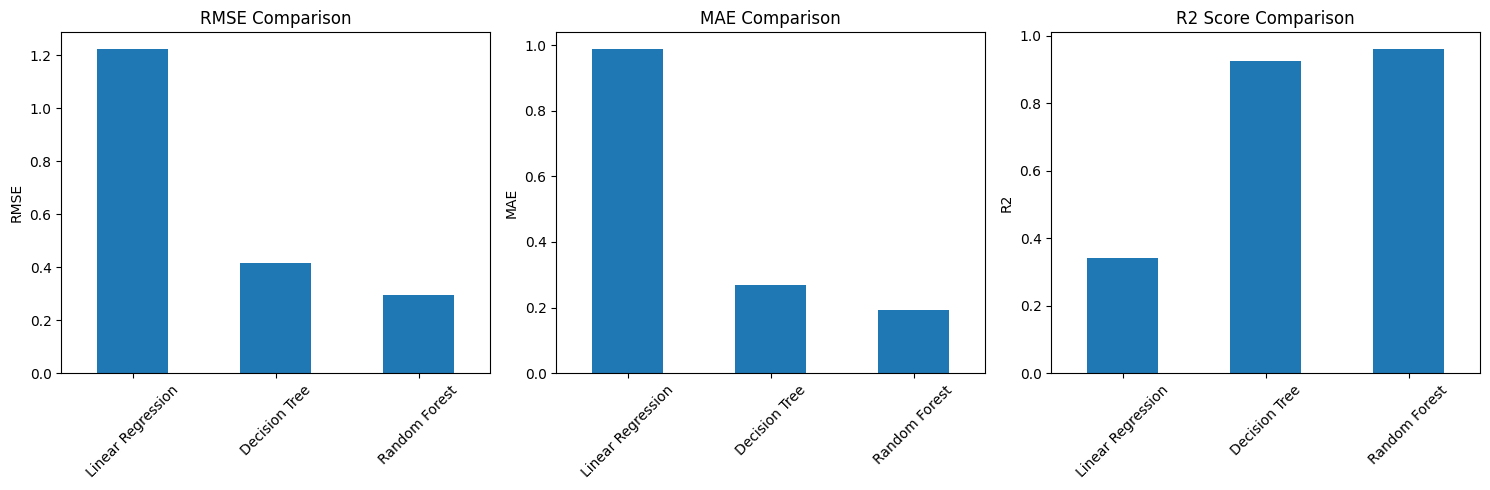

In [33]:
# Combine all metrics
all_metrics = {
    'Linear Regression': linear_metrics,
    'Decision Tree': decisiontree_metrics,
    'Random Forest': randomforest_metrics
}

plot_model_comparison(all_metrics)

## Observation:
Random Forest has the highest performance overall, as it has the lowest RMSE and MAE while maintaining the highest R2 score.




## **Level 3**

**Task 2 - Customert Preference Analysis**

1. Analyze the relationship between the type of cuisine and the restaurant's rating.
2. Identify the most popular cuisines among customers based on the number of votes.
3. Determine if there are any specific cuisines that tend to receive higher ratings.

**1. Analyze the relationship between the type of cuisine and the restaurant's rating.**

In [37]:
df["Cuisines"] = df["Cuisines"].astype(str).apply(lambda x: x.split(",")[0])

In [38]:
# Calculate average rating per cuisine
cuisine_ratings = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

In [40]:
# Top 10 cuisines with highest average ratings
print("\n Top 10 Cuisines with their Highest Average Ratings:")
top_cuisine_ratings = cuisine_ratings.head(10)
print(top_cuisine_ratings)


 Top 10 Cuisines with their Highest Average Ratings:
Cuisines
Sunda            4.900000
Scottish         4.700000
Cajun            4.700000
Taiwanese        4.650000
Filipino         4.616667
Persian          4.600000
Ramen            4.600000
World Cuisine    4.500000
Argentine        4.500000
Hawaiian         4.480000
Name: Aggregate rating, dtype: float64


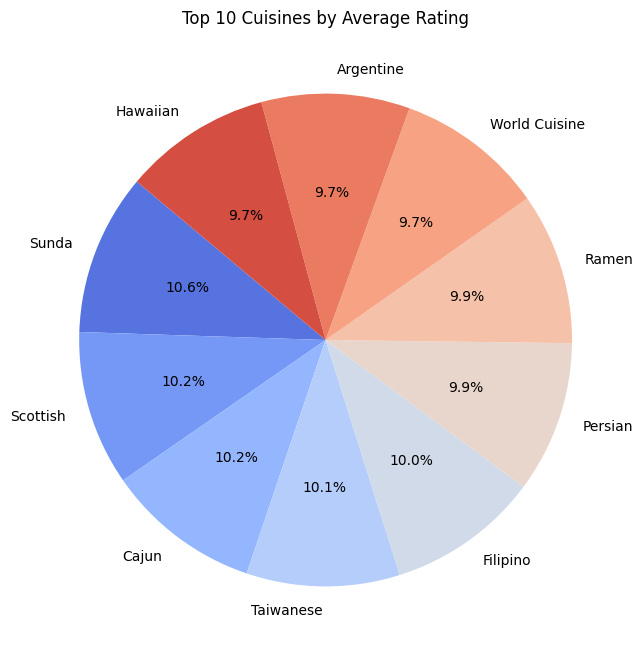

In [41]:
# Visualize as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_cuisine_ratings.values,
    labels=top_cuisine_ratings.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("coolwarm", len(top_cuisine_ratings))
)
plt.title("Top 10 Cuisines by Average Rating")
plt.show()

**2. Identify the most popular cuisines among customers based on the number of votes.**

In [43]:
# Aggregate votes by cuisine
cuisine_votes = df.groupby("Cuisines")["Votes"].sum().sort_values(ascending=False)

In [47]:
top_ten_cuisines = cuisine_votes.head(10)

In [48]:
print(top_ten_cuisines)

Cuisines
North Indian    356684
Cafe            116576
American        105447
Italian          95153
Continental      94569
Chinese          84918
European         45842
Fast Food        42617
Bakery           42008
Pizza            36415
Name: Votes, dtype: int64


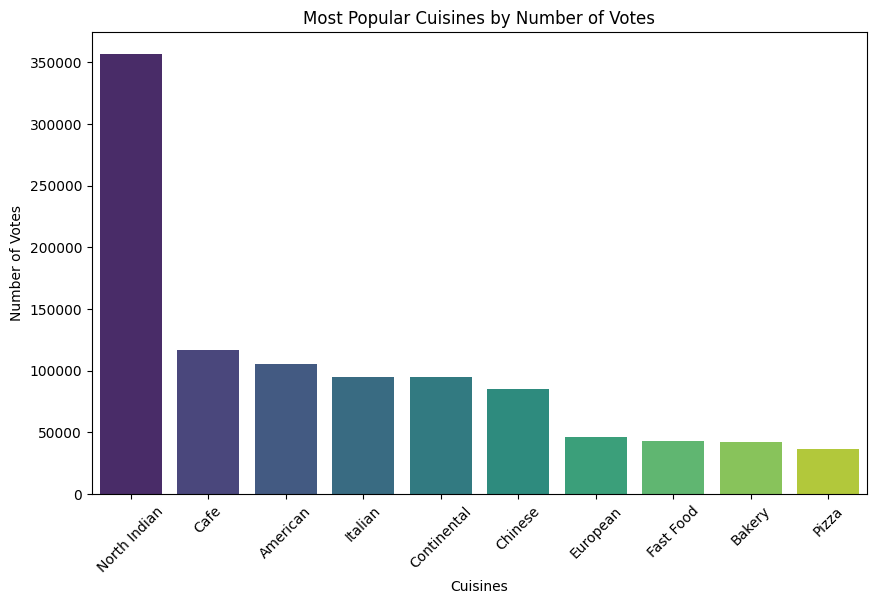

In [50]:
# Visualize the most popular cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_cuisines.index, y=top_ten_cuisines.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Cuisines")
plt.ylabel("Number of Votes")
plt.title("Most Popular Cuisines by Number of Votes")
plt.show()

**3. Determine if there are any specific cuisines that tend to receive higher ratings.**

In [52]:
# Calculate average rating for each cuisine
cuisine_ratings = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

In [54]:
top_ten_cuisines_rating = cuisine_ratings.head(10)

In [55]:
print(top_ten_cuisines_rating)

Cuisines
Sunda            4.900000
Scottish         4.700000
Cajun            4.700000
Taiwanese        4.650000
Filipino         4.616667
Persian          4.600000
Ramen            4.600000
World Cuisine    4.500000
Argentine        4.500000
Hawaiian         4.480000
Name: Aggregate rating, dtype: float64


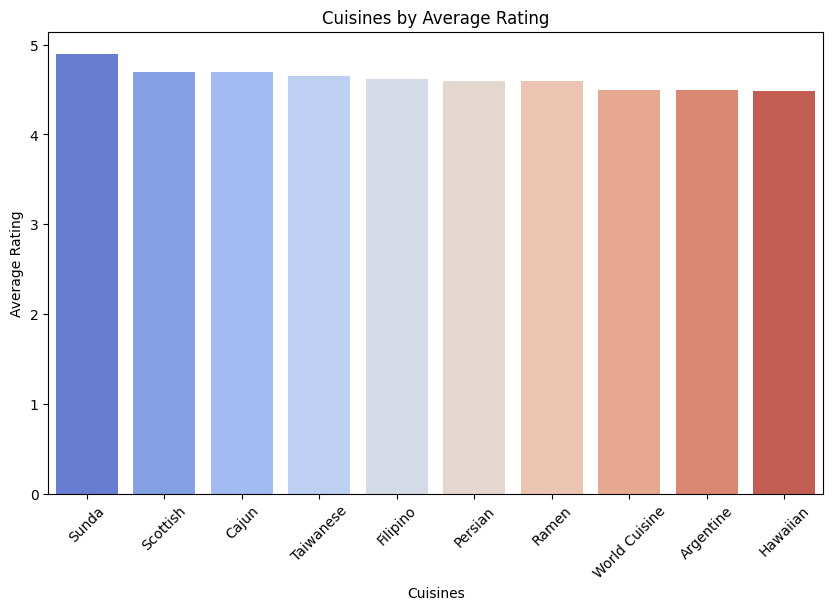

In [56]:
# Visualize the cuisines by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_cuisines_rating.index, y=top_ten_cuisines_rating.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.title("Cuisines by Average Rating")
plt.show()

## Observations:
1. Sunda is having the highest average rating
2. North India has the most popular cuisines based on votes

## **Level 3**

**Task 3 - Data Visualisation**

1. Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
2. Compare the average ratings of different cuisines or cities using appropriate visualizations.
3. Visualize the relationship between various features and the target variable to gain insights.

**1. Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).**

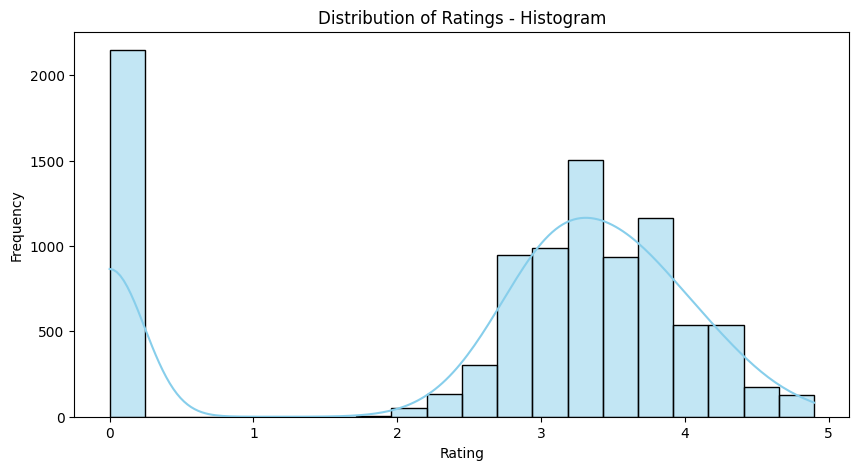

In [59]:
# Histogram to show the frequency distribution of ratings
plt.figure(figsize=(10, 5))
sns.histplot(df["Aggregate rating"], bins=20, kde=True, color="skyblue")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings - Histogram")
plt.show()

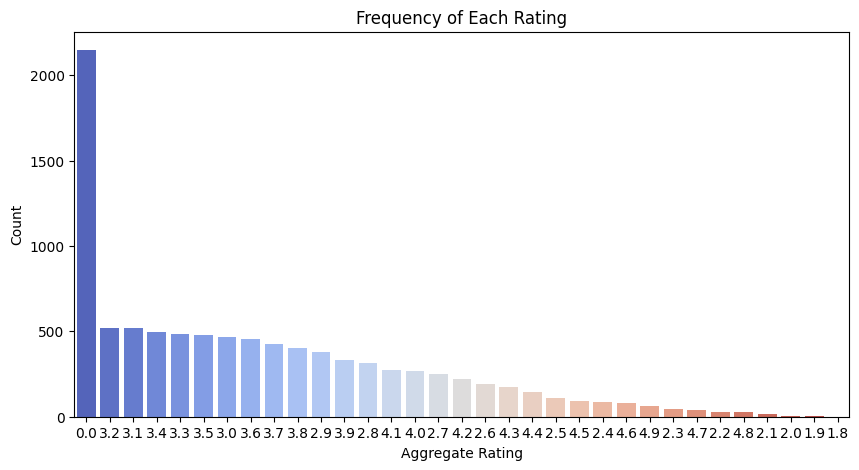

In [61]:
# Bar Plot: Count of Different Ratings
plt.figure(figsize=(10, 5))
sns.countplot(x="Aggregate rating", data=df, palette="coolwarm", order=df["Aggregate rating"].value_counts().index)
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Frequency of Each Rating")
plt.show()

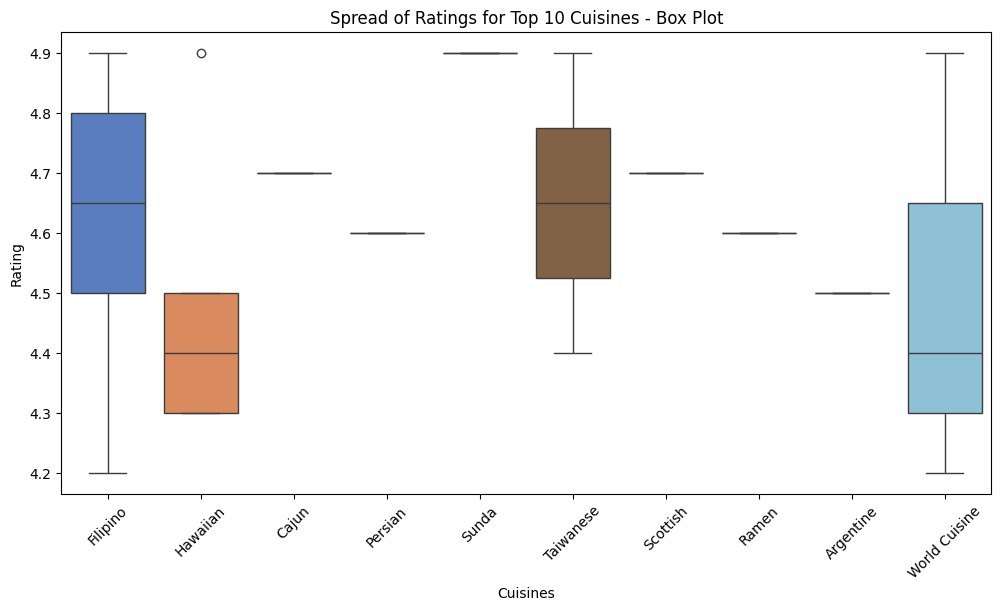

In [67]:
top_cuisines = cuisine_ratings.head(10).index
filtered_df = df[df["Cuisines"].isin(top_cuisines)]

# Box plot for top 10 cuisines
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cuisines", y="Aggregate rating", data=filtered_df, palette="muted")
plt.xlabel("Cuisines")
plt.ylabel("Rating")
plt.title("Spread of Ratings for Top 10 Cuisines - Box Plot")
plt.xticks(rotation=45)
plt.show()

**2. Compare the average ratings of different cuisines or cities using appropriate visualizations**.

In [69]:
# 1. Average ratings by cuisine
avg_cuisine_ratings = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

In [72]:
top_avd_cuisine_ratings = avg_cuisine_ratings.head(10)

In [70]:
# 2. Average ratings by city
avg_city_ratings = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)

In [76]:
top_avg_city_ratings = avg_city_ratings.head(10)

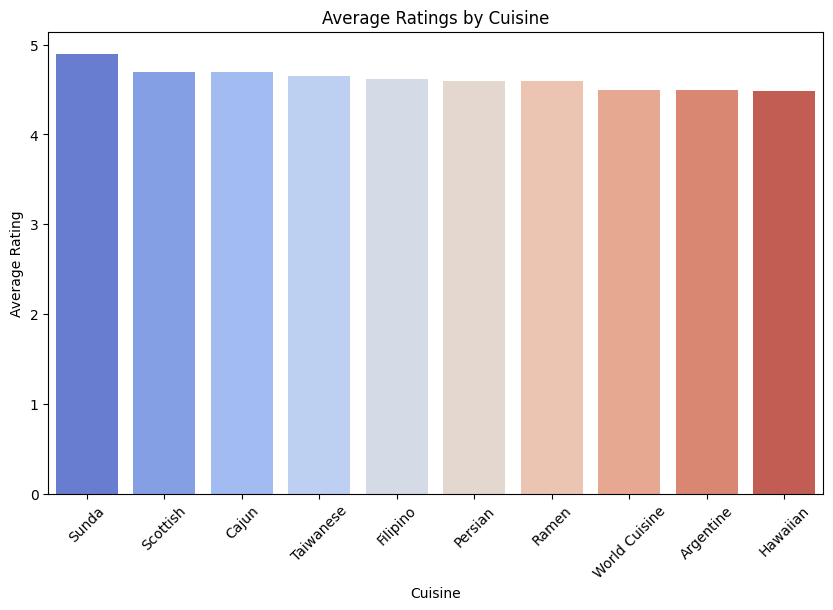

In [74]:
# Plot 1: Bar plot for average ratings by cuisine
plt.figure(figsize=(10, 6))
sns.barplot(x=top_avd_cuisine_ratings.index, y=top_avd_cuisine_ratings.values, palette="coolwarm")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.title("Average Ratings by Cuisine")
plt.xticks(rotation=45)
plt.show()

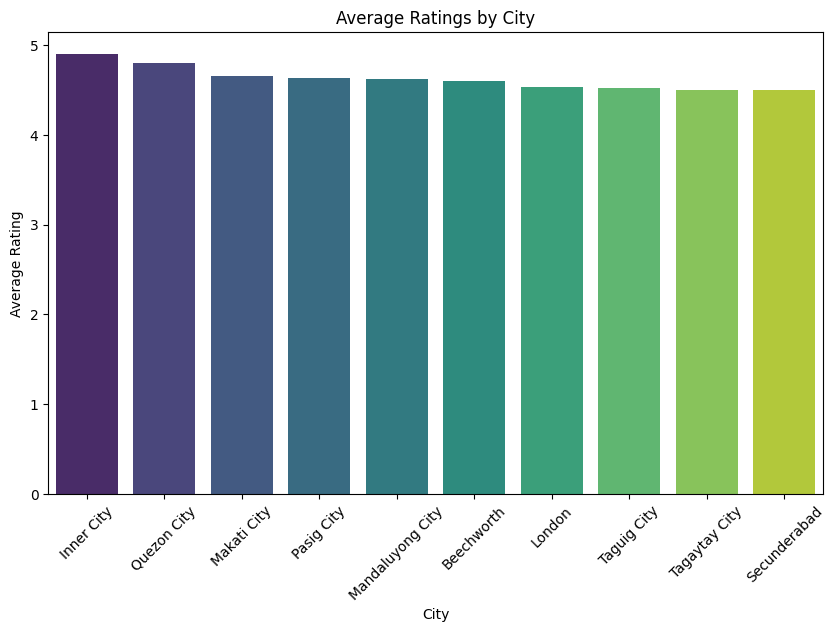

In [77]:
# Plot 2: Bar plot for average ratings by city
plt.figure(figsize=(10, 6))
sns.barplot(x=top_avg_city_ratings.index, y=top_avg_city_ratings.values, palette="viridis")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Average Ratings by City")
plt.xticks(rotation=45)
plt.show()

**3. Visualize the relationship between various features and the target variable to gain insights.**

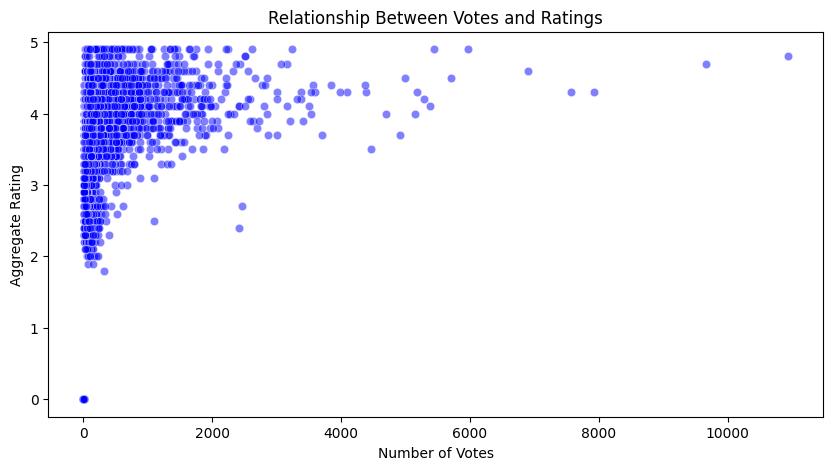

In [78]:
# Scatter Plot: Rating vs. Number of Votes
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Votes", y="Aggregate rating", data=df, color="blue", alpha=0.5)
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Relationship Between Votes and Ratings")
plt.show()

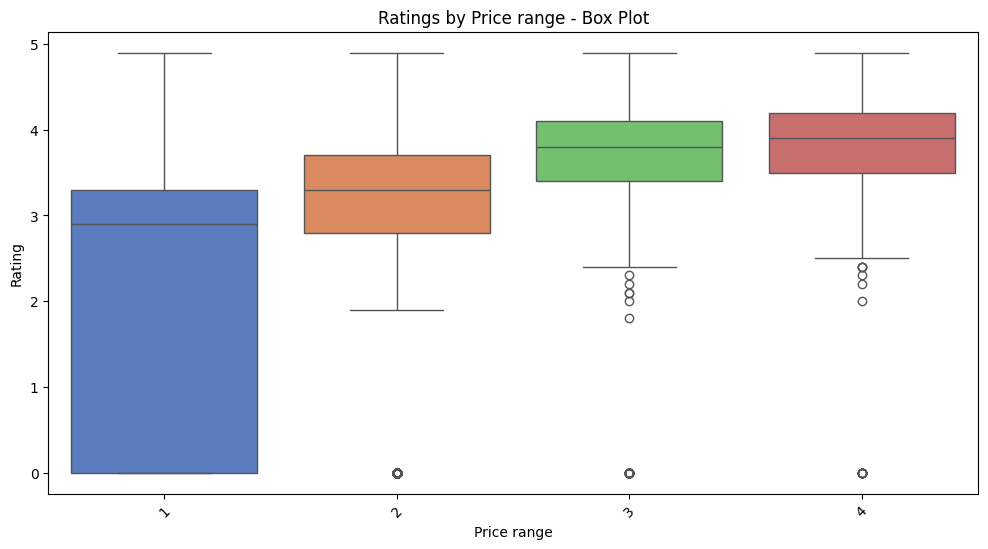

In [82]:
# Box plot for categorical features vs target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price range', y="Aggregate rating", data=df, palette="muted")
plt.xlabel("Price range")
plt.ylabel("Rating")
plt.title("Ratings by Price range - Box Plot")
plt.xticks(rotation=45)
plt.show()

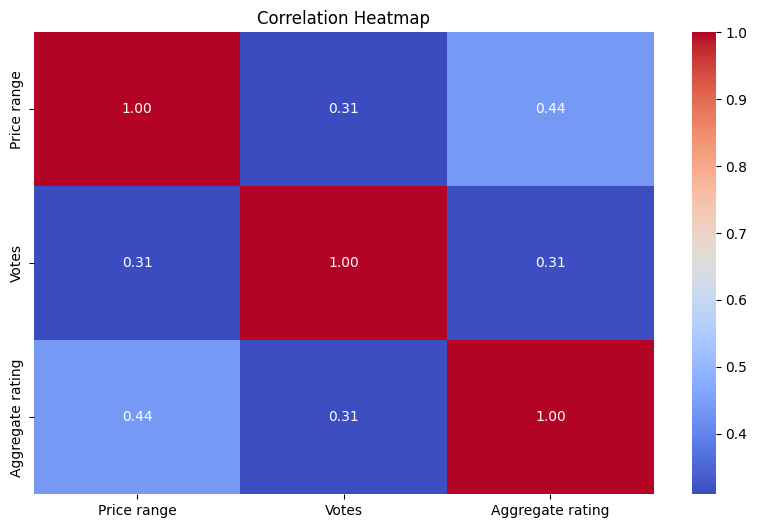

In [83]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
corr = df[["Price range", "Votes", "Aggregate rating"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

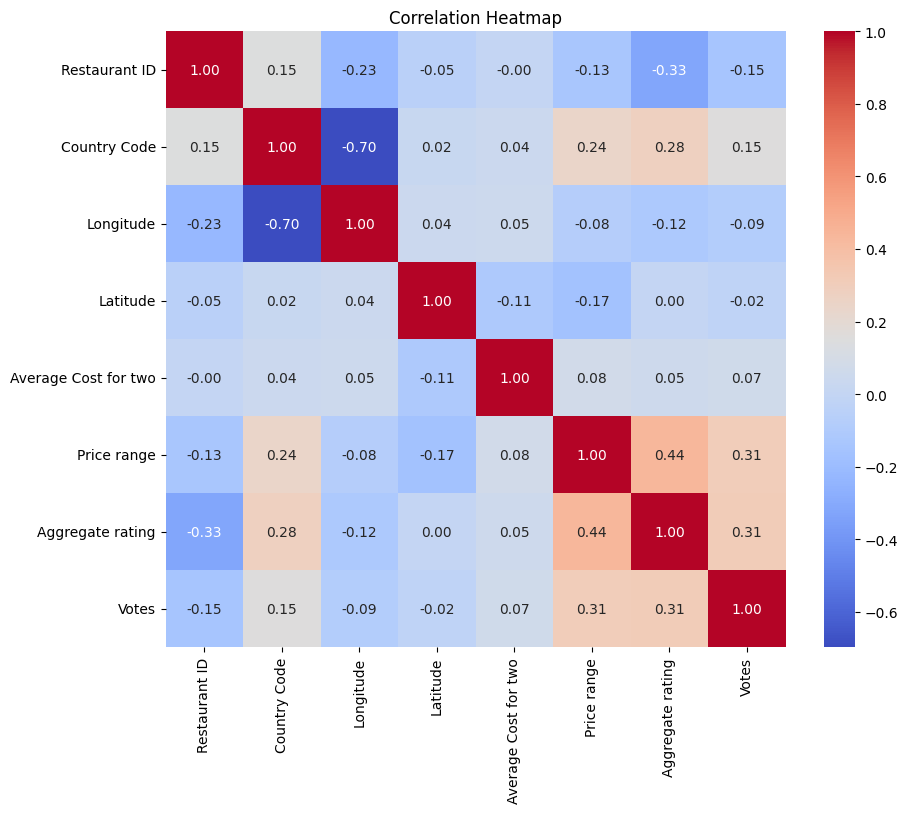

In [84]:
# Correlation heatmap for all numerical features
plt.figure(figsize=(10, 8))
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

## Observations:
1. There is a moderate positive correlation (~0.44) between the price range and aggregate ratings. This suggests that higher-priced restaurants are likely to have better ratings.
2. There is also a moderate positive correlation (~0.31) between votes and price range, meaning higher-priced restaurants are likely to receive more votes.
3. Weak negative correlations with latitude (0.00) and longitude (-0.12) suggest that location (in terms of latitude/longitude) has minimal influence on ratings.